In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import os

In [2]:
filepath=r"C:\Users\CSIO\Desktop\Diabetic Foot Research\Machine Learning Implementation\dataset_with_4_classes\combined_data\final.csv"
data=pd.read_csv(filepath)
data

,MTK1.T,MTK2.T,MTK3.T,MTK4.T,MTK5.T,D1.T,L.T,C.T,max_temp,min_temp,temp_range,condition
0,0.983221,1.579631,1.926185,2.091407,1.760453,0.619983,1.272439,0.915525,2.091407,0.619983,1.471423,0
1,0.125197,0.094649,0.608958,0.700101,1.500195,0.227996,1.762956,2.435764,2.435764,0.094649,2.341115,0
2,0.335517,0.938675,0.493425,0.343672,1.189942,1.257875,1.669362,1.263756,1.669362,0.335517,1.333844,0
3,0.343761,0.276866,0.537738,0.246287,1.398624,1.630739,0.438513,0.423720,1.630739,0.246287,1.384452,0
4,0.704690,1.595115,1.218438,0.859128,1.165247,0.722619,1.235193,3.400332,3.400332,0.704690,2.695642,1
...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.572060,0.651480,0.323167,2.548236,1.137525,3.652500,0.942357,0.385682,3.652500,0.323167,3.329333,1
74,1.643545,2.232720,2.246896,1.983081,1.971958,1.429466,1.704914,1.288972,2.246896,1.288972,0.957924,0
75,0.381049,1.013439,0.216111,0.816165,1.821659,1.642428,1.033259,0.374977,1.821659,0.216111,1.605548,0
76,0.609831,0.426914,1.071384,1.597074,2.917671,0.594115,3.530871,2.749073,3.530871,0.426914,3.103957,1


In [59]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['condition'])
y=data['condition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [60]:
len(y_test)

39

In [61]:
len(y_train)

39

# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
#Train the model 
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [63]:
y_pred=model.predict(X_train)

In [64]:
# Training Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_train)
print(f"Training accuracy:{accuracy*100}%")

Training accuracy:100.0%


In [65]:
#Testing Accuracy
y_pred=model.predict(X_test)
test_accuracy=accuracy_score(y_pred,y_test)
print(f"Testing Accuracy:{test_accuracy*100}%")

Testing Accuracy:94.87179487179486%


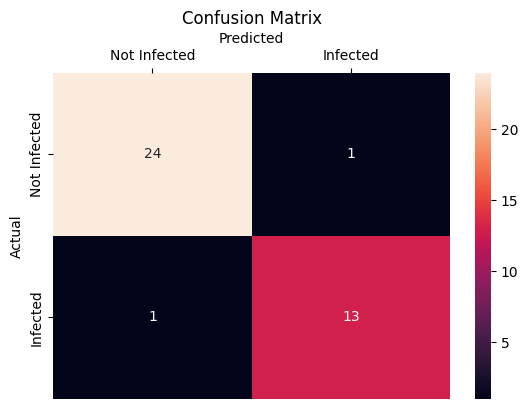

Accuracy: 0.95
Precision: 0.96
Sensitivity (Recall): 0.96
F1-Score: 0.96


In [66]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

actual=y_test
predicted=y_pred
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected', 'Infected'],
           yticklabels=['Not Infected', 'Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

# Extract values from the confusion matrix
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Sensitivity (Recall): {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

In [67]:
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.93      0.93      0.93        14

    accuracy                           0.95        39
   macro avg       0.94      0.94      0.94        39
weighted avg       0.95      0.95      0.95        39



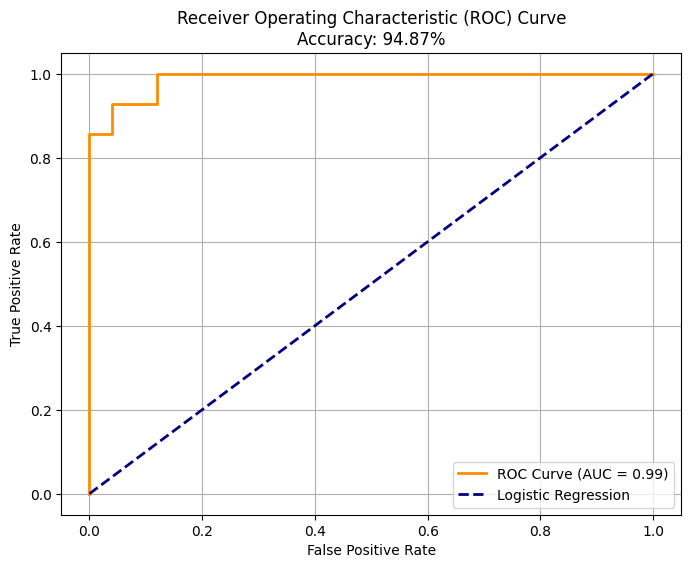

In [68]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Predict probabilities (only for the positive class)
y_prob = model.predict_proba(X_test)[:, 1]

# Predict labels (for accuracy)
y_pred = model.predict(X_test)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [75]:
import warnings
warnings.filterwarnings("ignore")
values=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.1,0.7]]
cond=model.predict(values)
print(cond)

[0]


In [76]:
values=[[3.1,2.2,0.3,4.4,0.5,0.6,0.7,0.8,4.4,0.3,4.1]]
cond=model.predict(values)
print(cond)

[1]


In [77]:
values=[[2.0,2.0,2.3,2.4,2.5,2.6,0.7,0.8,2.6,0.7,1.9]]
cond=model.predict(values)
print(cond)

[0]


In [78]:
values=[[6.1,2.2,0.3,0.4,0.5,0.6,9.7,0.8,6.1,0.3,5.8]]
cond=model.predict(values)
print(cond)

[1]


In [79]:
values=[[3.5,0.2,2.3,2.4,2.5,1.6,2.7,0.8,3.5,0.2,3.3]]
cond=model.predict(values)
print(cond)

[1]


In [80]:
#Failed here
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond=model.predict(values)
print(cond)

[0]


In [81]:
values=[[3,3,3,3,3,3,3,3,3,3,0]]
cond=model.predict(values)
print(cond)

[1]


In [83]:
values=[[0,0,0,0,0,0,0,0,0,0,0]]
cond=model.predict(values)
print(cond)

[0]


In [82]:
values=[[0,0.1,0,0.3,0.4,0,0,0,0.4,0.1,0.3]]
cond=model.predict(values)
print(cond)

[0]


In [118]:
import joblib 
joblib.dump(model,'./logreg_model.h5')

['./logreg_model.h5']

# Fine tuning the Logistic Regression

In [84]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : [0.0001,0.01,0.1,1,10,100],
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,200,500,1000],
     'l1_ratio':[0.1,0.5,0.7,1.0],
     'fit_intercept':[True,False]
}
]

In [85]:
clf = GridSearchCV(model,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
clf

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'fit_intercept': [True, False],
                          'l1_ratio': [0.1, 0.5, 0.7, 1.0],
                          'max_iter': [100, 200, 500, 1000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [86]:
import warnings
warnings.filterwarnings("ignore")
best_clf = clf.fit(X_train,y_train)
best_clf.best_estimator_

Fitting 3 folds for each of 3840 candidates, totalling 11520 fits


LogisticRegression(C=0.1, l1_ratio=0.1)

In [87]:
print(f'Accuracy - : {best_clf.score(X_test,y_test):.3f}')

Accuracy - : 0.923


In [88]:
actual=y_train
predicted=best_clf.predict(X_train)
accuracy=accuracy_score(actual,predicted)
print(f"Training accuracy:{accuracy:.3f}%")

Training accuracy:0.974%


In [89]:
actual=y_test
predicted=best_clf.predict(X_test)
accuracy=accuracy_score(actual,predicted)
print(f"Testing accuracy:{accuracy:.3f}%")

Testing accuracy:0.923%


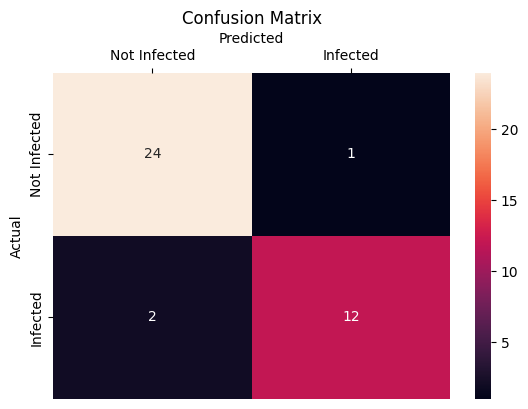

Accuracy: 92.308
Precision: 96.000
Sensitivity (Recall): 92.308
F1-Score: 94.118


In [90]:
actual=y_test
predicted=best_clf.predict(X_test)
cm=confusion_matrix(actual,predicted)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected', 'Infected'],
           yticklabels=['Not Infected', 'Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"Accuracy: {accuracy*100:.3f}")
print(f"Precision: {precision*100:.3f}")
print(f"Sensitivity (Recall): {recall*100:.3f}")
print(f"F1-Score: {f1_score*100:.3f}")

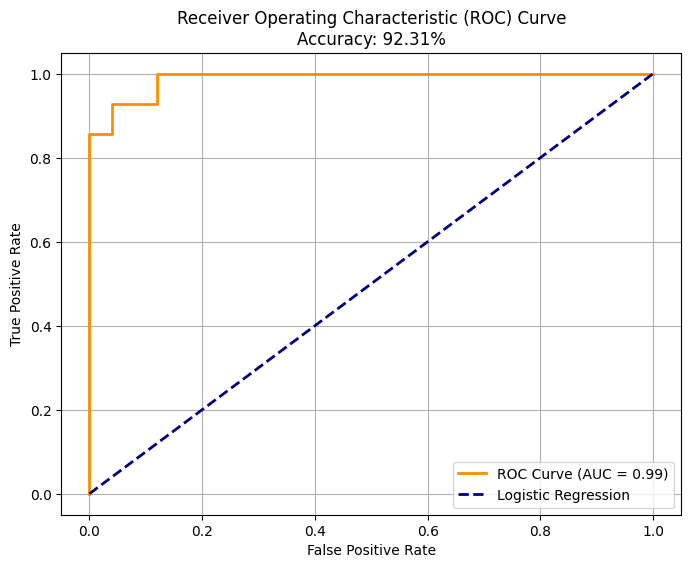

In [91]:
# Predict probabilities (only for the positive class)
y_prob = best_clf.predict_proba(X_test)[:, 1]

# Predict labels (for accuracy)
y_pred = best_clf.predict(X_test)

# Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [92]:
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.92      0.86      0.89        14

    accuracy                           0.92        39
   macro avg       0.92      0.91      0.92        39
weighted avg       0.92      0.92      0.92        39



In [93]:
values=[[2.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,2.2,0.3,1.9]]
cond=best_clf.predict(values)
print(cond)

[0]


In [99]:
values=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.1,0.7]]
cond=best_clf.predict(values)
print(cond)

[0]


In [100]:
values=[[3.1,2.2,0.3,4.4,0.5,0.6,0.7,0.8,4.4,0.3,4.1]]
cond=best_clf.predict(values)
print(cond)

[1]


In [101]:
values=[[2.0,2.0,2.3,2.4,2.5,2.6,0.7,0.8,2.6,0.7,1.9]]
cond=best_clf.predict(values)
print(cond)

[0]


In [102]:
values=[[6.1,2.2,0.3,0.4,0.5,0.6,9.7,0.8,6.1,0.3,5.8]]
cond=best_clf.predict(values)
print(cond)

[1]


In [103]:
values=[[3.5,0.2,2.3,2.4,2.5,1.6,2.7,0.8,3.5,0.2,3.3]]
cond=best_clf.predict(values)
print(cond)

[1]


In [105]:
#failed here
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond=best_clf.predict(values)
print(cond)

[0]


In [107]:
#failed here
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
cond=best_clf.predict(values)
print(cond)

[0]


In [108]:
values=[[3.1,3,3,3,3,3,3,3,3.1,3,0.1]]
cond=model.predict(values)
print(cond)

[1]


In [109]:
values=[[3,3,3,3,3,3,3,3,3,3,0]]
cond=model.predict(values)
print(cond)

[1]


In [110]:
values=[[0,0.1,0,0.3,0.4,0,0,0,0.4,0.1,0.3]]
cond=model.predict(values)
print(cond)

[0]


In [111]:
values=[[0,0,0,0,0,0,0,0,0,0,0]]
cond=model.predict(values)
print(cond)

[0]


In [112]:
values=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.1,0.7]]
cond=best_clf.predict(values)
print(cond)

[0]


In [113]:
values=[[3.1,2.2,0.3,4.4,0.5,0.6,0.7,0.8,4.4,0.3,4.1]]
cond=best_clf.predict(values)
print(cond)

[1]


In [114]:
values=[[2.0,2.0,2.3,2.4,2.5,2.6,0.7,0.8,2.6,0.7,1.9]]
cond=best_clf.predict(values)
print(cond)

[0]


In [115]:
values=[[6.1,2.2,0.3,0.4,0.5,0.6,9.7,0.8,6.1,0.3,5.8]]
cond=best_clf.predict(values)
print(cond)

[1]


In [117]:
values=[[3.5,0.2,2.3,2.4,2.5,1.6,2.7,0.8,3.5,0.2,3.3]]
cond=best_clf.predict(values)
print(cond)

[1]
